# Steps

In [63]:
# Define the problem
    # Binary classification

# Data Access
    # (.info(), describe(), .shape, .head(), .tail(), isnull(), .value_counts())
# Exploratory Data Analysis (EDA)
    # univariate analysis, bivariate analysis, (.distplot(), .countplot(), .boxplot(), .scatterplot(), .pairplot()), 
    # distribution (.histplot())
    # corellation (.heatmap())

# Data Preprocessing
    # from sklearn.model_selection import train_test_split
    # from sklearn.preprocessing import StandardScaler
    # data types, data mixture, shape, outliers, missing values, noisy data, skewness and kurtosis
# Model Building
    # from sklearn.linear_model import LogisticRegression, SGDClassifier
    # from sklearn.svm import LinearSVC
    # from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    # from sklearn.naive_bayes import GaussianNB
    
# Model Validation
    # from sklearn.pipeline import Pipeline
    # from sklearn.model_selection import KFold, cross_val_score
    # from sklearn.model_selection import StratifiedKFold, KFold
    # from sklearn.model_selection import GridSearchCV
# Model Execution
    # Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
    # Precision: A measure of a classifiers exactness.
    # Recall: A measure of a classifiers completeness
    # F1 Score (or F-score): A weighted average of precision and recall.
# Deployment

In [64]:
import numpy as np
import pandas as pd

In [65]:
def data_load() -> list:
    """ """
    
    train_data = pd.read_csv("project_data/train_data.csv", header=None)
    test_data = pd.read_csv("project_data/test_data.csv", header=None)
    train_labels = pd.read_csv("project_data/train_labels.csv", header=None)
    
    return [train_data, test_data, train_labels]

In [66]:
train_data, test_data, train_labels = data_load()

In [67]:
data = [train_data, test_data, train_labels]
names = ["train_data", "test_data", "train_labels"]

# Preprocessing

### problem: multidimensional dataset, 
### solution: dimensional reduction (Correlation Heatmap, Univariate Selection/ PCA - Principal Component Analysis/ RFE - Recursive Feature Elimination)

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [69]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

In [70]:
# standar scaling
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [71]:
# Univariate Selection
array_x = X_train_std
array_y = y_train.values.ravel()
print(f"Shape before: {array_x.shape}")
# feature extraction - 3333/10000=~1/3
test = SelectKBest(score_func=f_classif, k=3207)
fit = test.fit(array_x, array_y)
features = fit.transform(array_x)
# summarize selected features
print(f"Shape after: {features.shape}")

Shape before: (2812, 10000)
Shape after: (2812, 3207)


In [ ]:
# evaluating number of features
scores = fit.scores_
score_df = pd.DataFrame(scores, columns=["Scores"])
score_df.index.name= "column n."
print(f"min score: {min(score_df.Scores)}, max score: {max(score_df.Scores)}, mean score: {np.mean(score_df.Scores)}")

In [ ]:
score_df.drop(score_df[score_df.Scores < 1].index, inplace=True)
score_df

In [73]:
univariate_X_train = features

In [75]:
# Principal Component Analysis
array_x = univariate_X_train
array_y = y_train.values.ravel()
# feature extraction
pca = PCA(n_components=100)
fit = pca.fit(array_x)
features = fit.transform(array_x)
# summarize components
print(f"Explained Variance: \n{fit.explained_variance_ratio_}\n")
print(f"Components: \n{fit.components_}\n")

Explained Variance: [0.00140602 0.0013164  0.0013112  0.00129819 0.00129364 0.0012862
 0.00128408 0.00128002 0.00127328 0.00126905 0.00126695 0.00126008
 0.00125425 0.00125231 0.00125075 0.00124692 0.00124357 0.00123958
 0.00123723 0.00123669 0.00123181 0.00122878 0.00122691 0.00121946
 0.00121876 0.00121541 0.00121492 0.00120885 0.00120668 0.00120563
 0.00120146 0.00120079 0.0011957  0.00119415 0.00118987 0.00118797
 0.00118575 0.00118223 0.00118028 0.00117904 0.00117713 0.00117214
 0.00117076 0.00116835 0.0011671  0.001166   0.0011607  0.00115521
 0.0011543  0.00115136 0.00114933 0.00114796 0.00114218 0.00114069
 0.00113948 0.00113817 0.00113549 0.00113366 0.00113134 0.00112718
 0.00112137 0.00112057 0.00111856 0.00111753 0.0011155  0.00111251
 0.0011084  0.00110428 0.00110267 0.00110031 0.00109903 0.00109702
 0.00109572 0.00108924 0.00108836 0.00108735 0.00108479 0.00108112
 0.00107898 0.00107739 0.00107504 0.00107115 0.00106999 0.00106815
 0.00106333 0.0010594  0.00105818 0.0010544

In [76]:
univariate_pca_X_train = features
univariate_pca_X_train.shape

(2812, 100)

In [78]:
# Recursive Feature Elimination
array_x = univariate_pca_X_train
array_y = y_train.values.ravel()
# feature extraction
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10)
fit = rfe.fit(array_x, array_y)
features = fit.transform(array_x)
# summarize components
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False  True False False False False False
 False  True False False False False False False  True False False  True
 False False False False]
Feature Ranking: [ 1  1 91 80 50 28  3  4 72 48  5 87 74 58 37 71 42  1 25 20 86 18 19 45
 13 43 55 17 52 21 69 39 44 33 60 51  9 14 76 46 10  6 78 16 67 84 88 59
 79 29 12 11 32  1  7 61 54 66 31 77 62  2 24 68  1 63 47 75 53 89  1  8
 85 81 57 15 23 38  1 30 22 82 40 70 64  1 36 90 73 83 34 56  1 41 65  1
 49 35 27 26]


In [79]:
univariate_pca_rfe_X_train = features
univariate_pca_rfe_X_train.shape

(2812, 10)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

kpca = KernelPCA()
svc_model = SVC()

pipe = Pipeline(steps=[('kpca', kpca), ('svc_model', svc_model)])
pipe.fit(X_train_std, y_train)

param_dict = {"kpca__gamma": np.linspace(0.03, 0.05, 5),
              "kpca__kernel": ['linear', 'poly', 'rbf'],
              "svc_model__C": [0.1, 1, 10, 100, 1000],
              "svc_model__gamma": [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(pipe, param_dict, verbose=0)
grid.fit(X_train_std, y_train)

C:\Users\DJaskulski\miniconda3\envs\cdv_data_prep\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
# define pipeline
pipe = Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=seed)),
    ("tsne", TSNE(n_components=2, random_state=seed)),
])

In [ ]:
# fit transform method
piped = pipe.fit_transform(test_data_02)

### problem: unbalanced dataset, 
### solution: Random Oversampling/SMOTE

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Random Oversampling/Undersampling

# define pipeline
over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.4)
steps = [('o', over), ('u', under), ('m', SVC(kernel="linear", C=1))]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, univariate_pca_rfe_X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)

print(f"F1 scores: \n{scores}\n")
print(f"F1 mean score: \n{np.mean(scores)}\n")

# EDA part 2

In [16]:
sliced_train_data = train_data.iloc[:,0:10000:500]

In [27]:
def data_correlation(sliced_train_data):
    """ """
    
    # checking corellation heatmap
    plt.figure(figsize=(20, 10))
    # Masking the upper triangle part of the matrix
    heat_mask = np.triu(np.ones_like(sliced_train_data.corr(), dtype=bool))
    # Plotting heatmap
    sns.heatmap(sliced_train_data.corr(), mask=heat_mask, vmin=-1, vmax=1, annot=True)
    plt.title("Correlation heatmap for sliced train data")
    plt.tight_layout();
    
    return plt.show()

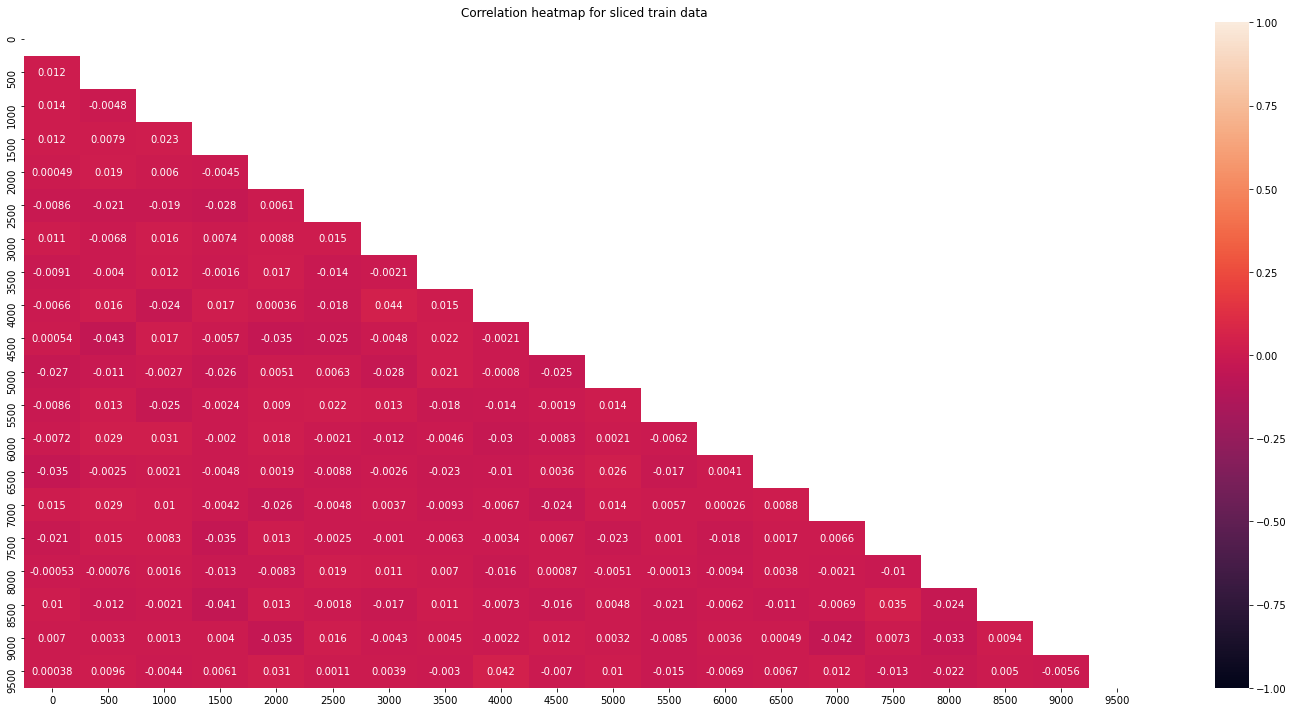

In [28]:
data_correlation(sliced_train_data)

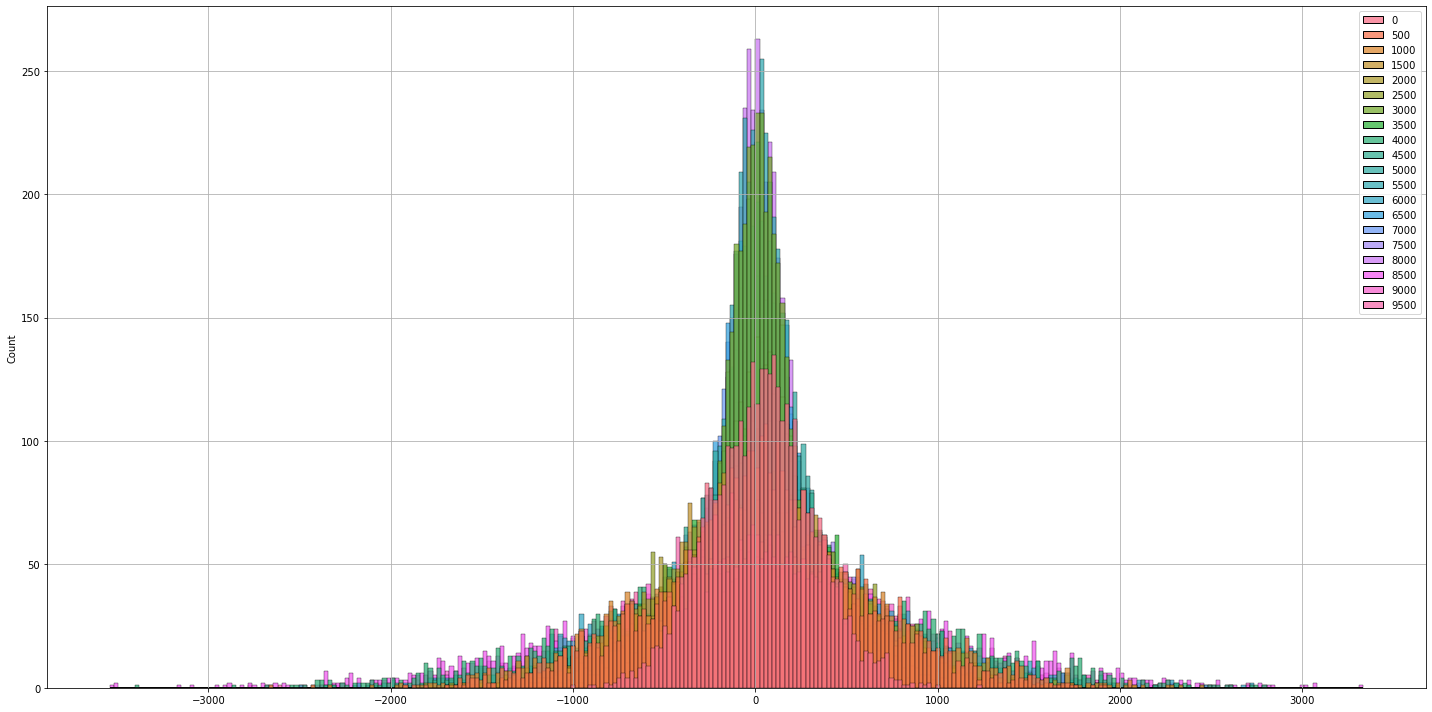

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(data=sliced_train_data)
#plt.xticks([0, 20, 25, 30, 40, 57])
plt.grid()
plt.tight_layout();

<Figure size 1440x720 with 0 Axes>

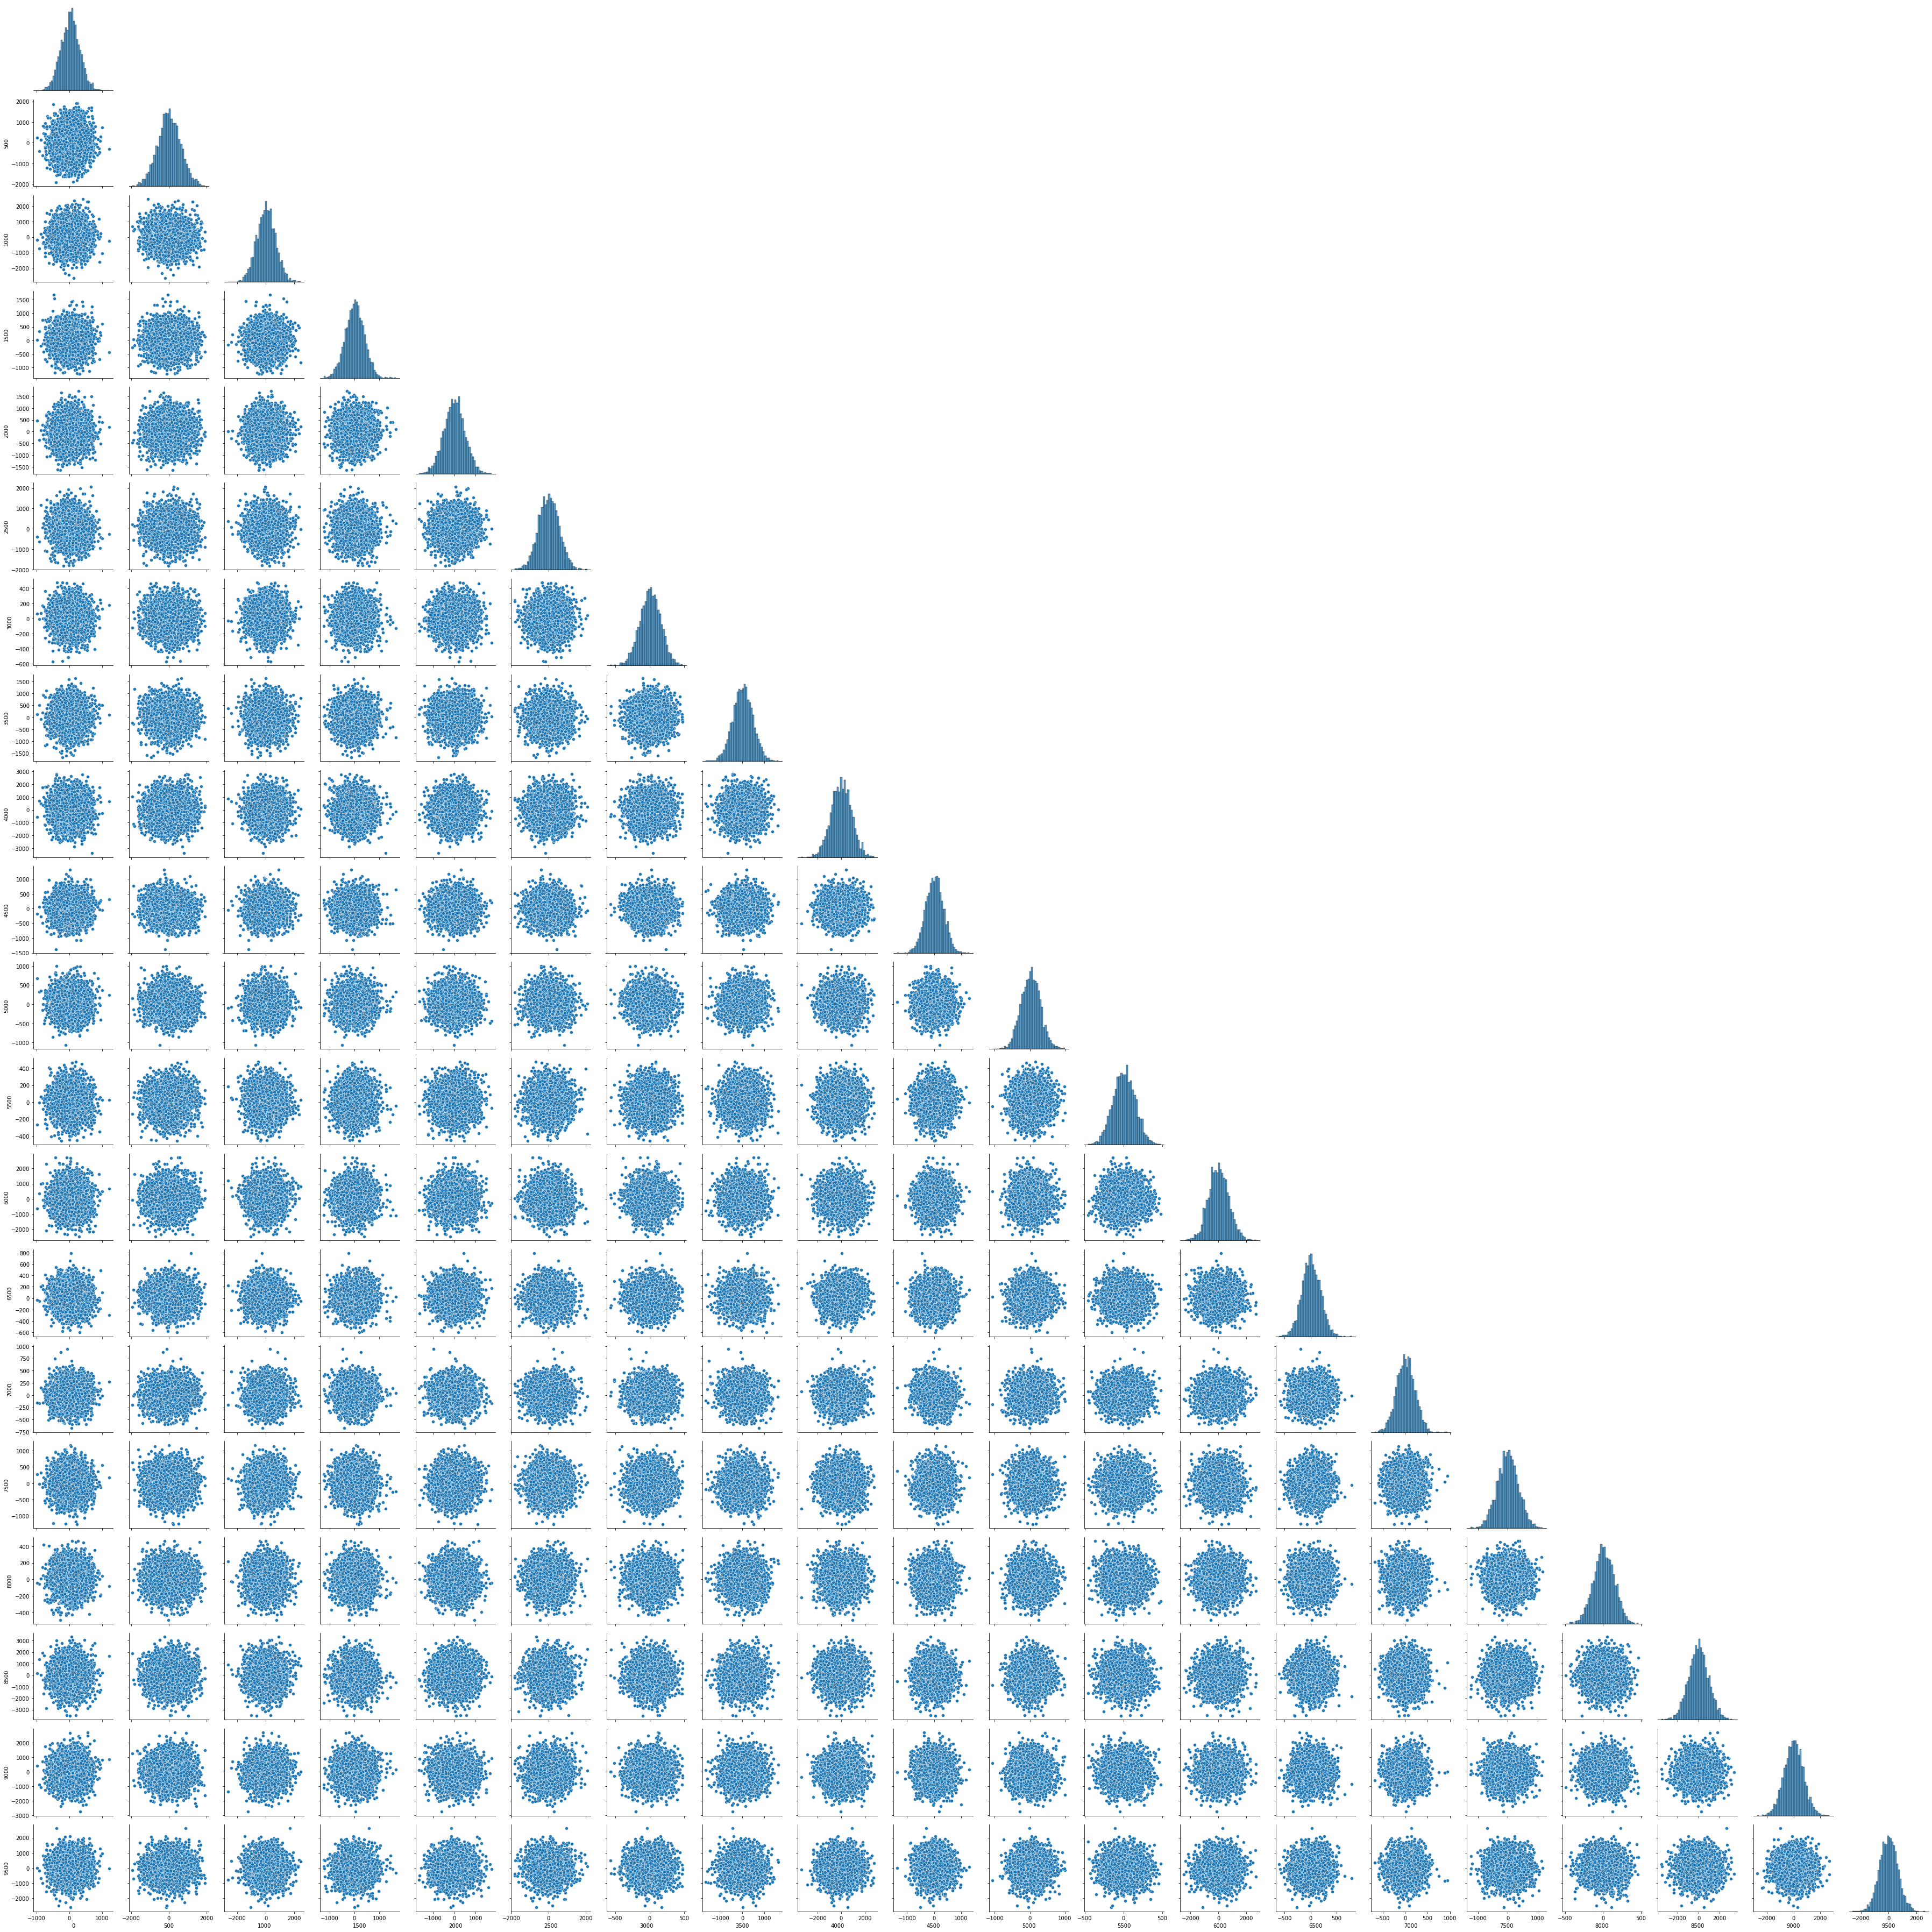

In [30]:
plt.figure(figsize=(20,10))
sns.pairplot(sliced_train_data, corner=True)
plt.tight_layout();

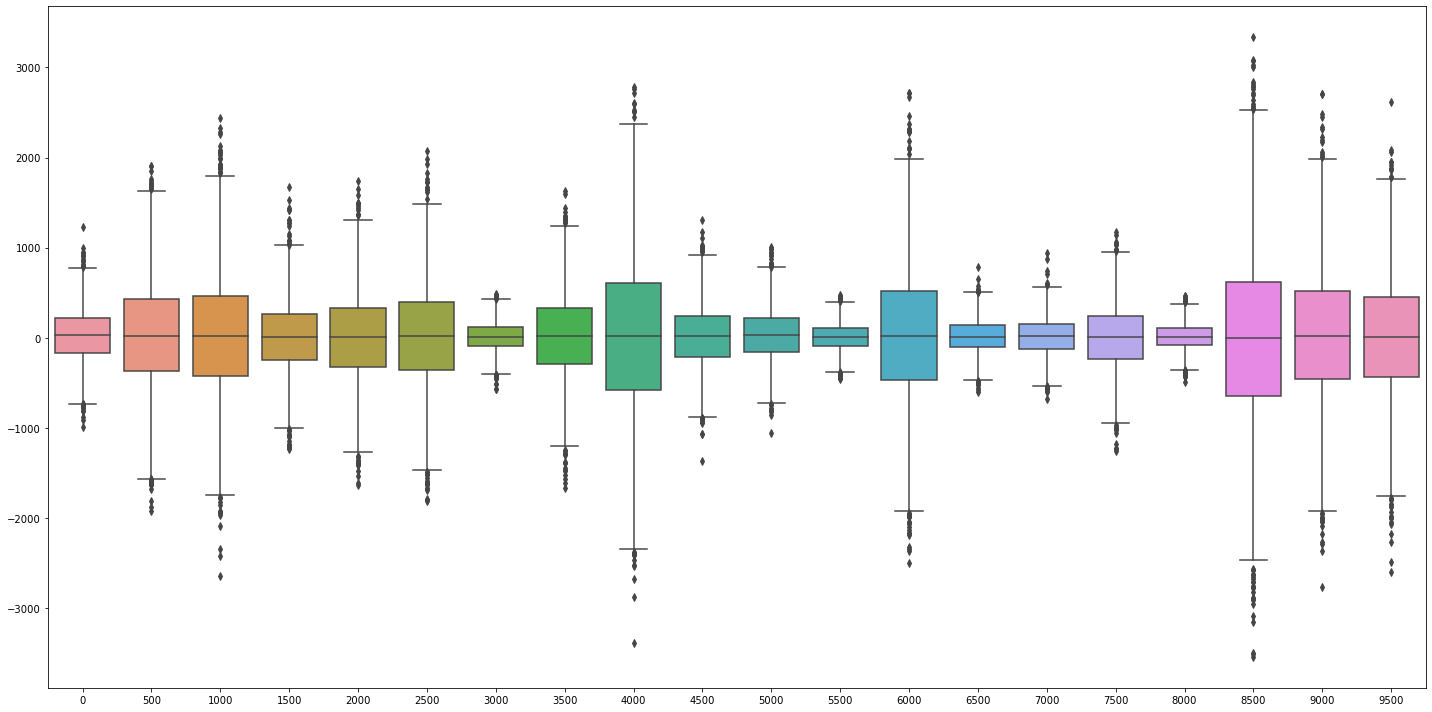

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=sliced_train_data)
plt.tight_layout();

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8))

# “bars”, “step”, “poly”
sns.histplot(ax=axes[0], data=houses_df_small, bins=30, x='Price', color='r', element='bars')
axes[0].set_title("prices for small houses")
axes[0].grid(True)

sns.histplot(ax=axes[1], data=houses_df_big, bins=30, x='Price', color='g', element='step')
axes[1].set_title("prices for big houses")
axes[1].grid(True)

sns.histplot(ax=axes[2], data=houses_df_enormous, bins=30, x='Price', color='b', element='poly')
axes[2].set_title("prices for enormous houses")
axes[2].grid(True)
fig.tight_layout();

# Basic Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

In [ ]:
search_space = [
    {"classifier": [logistic],
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": np.logspace(0, 4, 10)},
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [10, 50, 100],
    "classifier__max_features": [1, 2, 3]},
    {"classifier": [KNeighborsClassifier()],
    "classifier__n_neighbors": range(1, 10, 1),
    "classifier__leaf_size": [30, 60, 90]}
]

In [ ]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=1, n_jobs=-1)

In [ ]:
best_model = gridsearch.fit(features, target)

In [ ]:
print(best_model.best_estimator_.get_params()["classifier"])

In [ ]:
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
model = HyperoptEstimator(
    classifier=any_classifier("cla"),
    preprocessing=any_preprocessing("pre"),
    algo=tpe.suggest,
    max_evals=20,
    trial_timeout=30,
    n_jobs=-1
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)

In [ ]:
print(model.best_model())